<a href="https://colab.research.google.com/github/Jesus2342/MLOps_Team_33/blob/develop/Fase_1_Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MLOps/Fase 1/"
os.chdir(DIR)

In [26]:
import pandas as pd
from scipy.io import arff
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

In [4]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [5]:
data, meta = arff.loadarff('CEE_DATA.arff')
df = pd.DataFrame(data)
df = df.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x) #Realizamos la codificación del dataset de byte a string en cada celda

In [6]:
print("Descripción básica del DataFrame:")
df.describe(include='all')


Descripción básica del DataFrame:


,Performance,Gender,Caste,coaching,time,Class_ten_education,twelve_education,medium,Class_ X_Percentage,Class_XII_Percentage,Father_occupation,Mother_occupation
count,666,666,666,666,666,666,666,666,666,666,666,666
unique,4,2,4,3,6,3,3,3,4,4,8,9
top,Good,male,General,WA,TWO,SEBA,AHSEC,ENGLISH,Excellent,Excellent,OTHERS,HOUSE_WIFE
freq,210,355,329,449,368,396,368,536,511,398,277,442


# LIMPIEZA DE LOS DATOS

Identificamos los valores faltantes

In [7]:
valores_faltantes=df.isnull().sum()
valores_faltantes

,0
Performance,0
Gender,0
Caste,0
coaching,0
time,0
Class_ten_education,0
twelve_education,0
medium,0
Class_ X_Percentage,0
Class_XII_Percentage,0


In [8]:
# Detectar filas duplicadas
duplicated_rows = df[df.duplicated(keep=False)]
duplicated_rows


,Performance,Gender,Caste,coaching,time,Class_ten_education,twelve_education,medium,Class_ X_Percentage,Class_XII_Percentage,Father_occupation,Mother_occupation
48,Excellent,female,General,WA,TWO,CBSE,CBSE,ENGLISH,Excellent,Excellent,OTHERS,OTHERS
63,Excellent,female,General,WA,TWO,CBSE,CBSE,ENGLISH,Excellent,Excellent,OTHERS,OTHERS
68,Excellent,female,General,WA,TWO,CBSE,CBSE,ENGLISH,Excellent,Excellent,OTHERS,HOUSE_WIFE
77,Excellent,male,General,OA,TWO,CBSE,CBSE,ENGLISH,Excellent,Excellent,OTHERS,HOUSE_WIFE
82,Excellent,male,General,OA,TWO,CBSE,CBSE,ENGLISH,Excellent,Excellent,OTHERS,HOUSE_WIFE
...,...,...,...,...,...,...,...,...,...,...,...,...
615,Average,male,ST,WA,TWO,CBSE,CBSE,ENGLISH,Excellent,Vg,OTHERS,HOUSE_WIFE
616,Average,male,ST,WA,TWO,CBSE,CBSE,ENGLISH,Excellent,Vg,OTHERS,HOUSE_WIFE
622,Average,female,ST,WA,TWO,CBSE,CBSE,ENGLISH,Excellent,Excellent,OTHERS,HOUSE_WIFE
650,Average,male,ST,WA,THREE,SEBA,AHSEC,ENGLISH,Good,Good,SCHOOL_TEACHER,HOUSE_WIFE


In [9]:
df= df.drop_duplicates()

# Mostrar el DataFrame sin duplicados
print("\nDataFrame sin duplicados:")
df


DataFrame sin duplicados:


,Performance,Gender,Caste,coaching,time,Class_ten_education,twelve_education,medium,Class_ X_Percentage,Class_XII_Percentage,Father_occupation,Mother_occupation
0,Excellent,male,General,NO,ONE,SEBA,AHSEC,ENGLISH,Excellent,Excellent,DOCTOR,OTHERS
1,Excellent,male,OBC,WA,TWO,SEBA,AHSEC,OTHERS,Excellent,Excellent,SCHOOL_TEACHER,HOUSE_WIFE
2,Excellent,male,OBC,OA,TWO,OTHERS,CBSE,ENGLISH,Excellent,Excellent,BUSINESS,HOUSE_WIFE
3,Excellent,male,General,WA,ONE,SEBA,AHSEC,OTHERS,Excellent,Excellent,SCHOOL_TEACHER,SCHOOL_TEACHER
4,Excellent,male,General,OA,TWO,SEBA,CBSE,ENGLISH,Excellent,Excellent,COLLEGE_TEACHER,HOUSE_WIFE
...,...,...,...,...,...,...,...,...,...,...,...,...
660,Average,female,ST,WA,TWO,SEBA,CBSE,ENGLISH,Good,Vg,DOCTOR,SCHOOL_TEACHER
661,Average,female,ST,WA,ONE,SEBA,AHSEC,ENGLISH,Good,Vg,OTHERS,HOUSE_WIFE
662,Average,male,ST,WA,THREE,SEBA,AHSEC,ENGLISH,Vg,Good,CULTIVATOR,HOUSE_WIFE
663,Average,male,ST,WA,TWO,SEBA,CBSE,ENGLISH,Good,Vg,OTHERS,SCHOOL_TEACHER


# Exploración de los Datos

Observamos que no tenemos valores faltantes en las columnas categoricas, por lo que no hay necesidad de hacer algun tratamiento en el dataset.

**Graficamos las variables categoricas de nuestro Dataset**

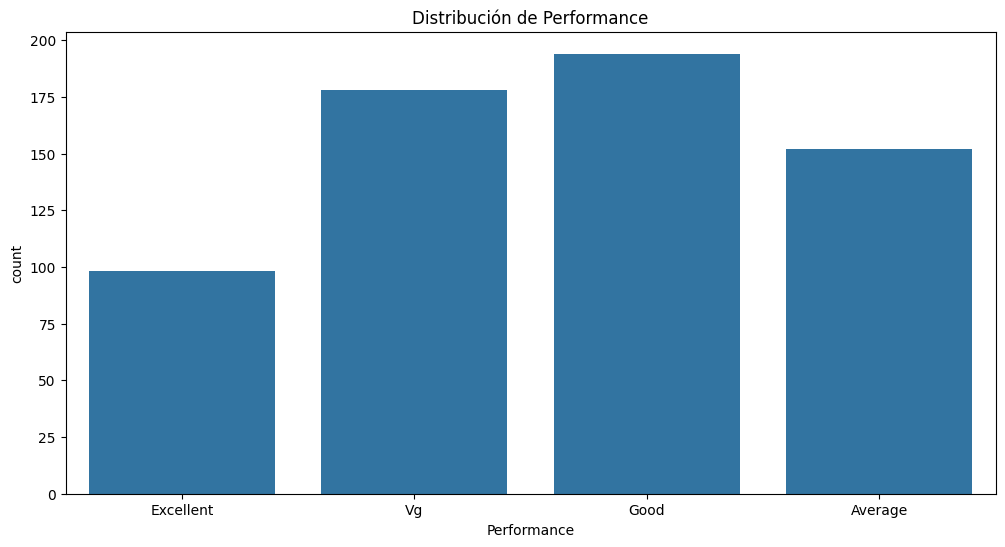

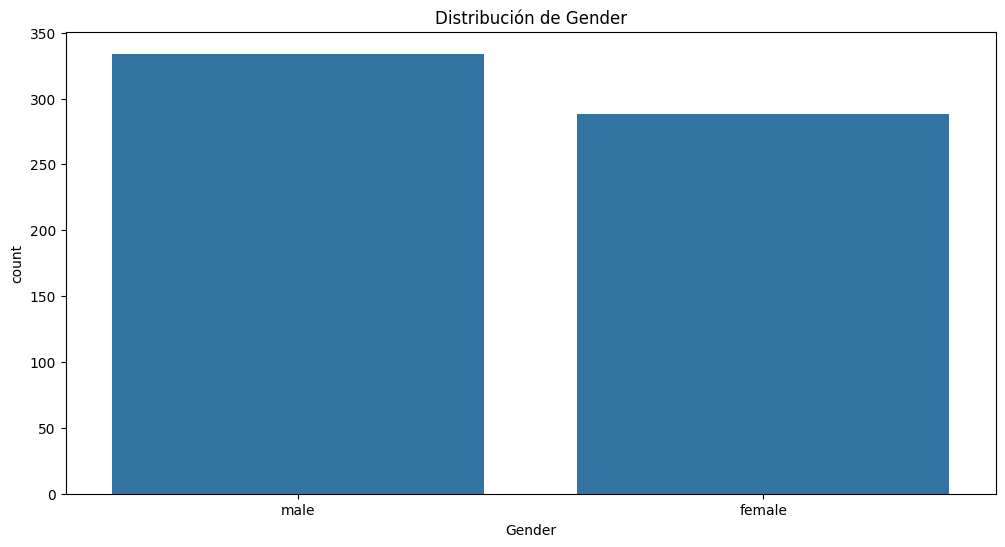

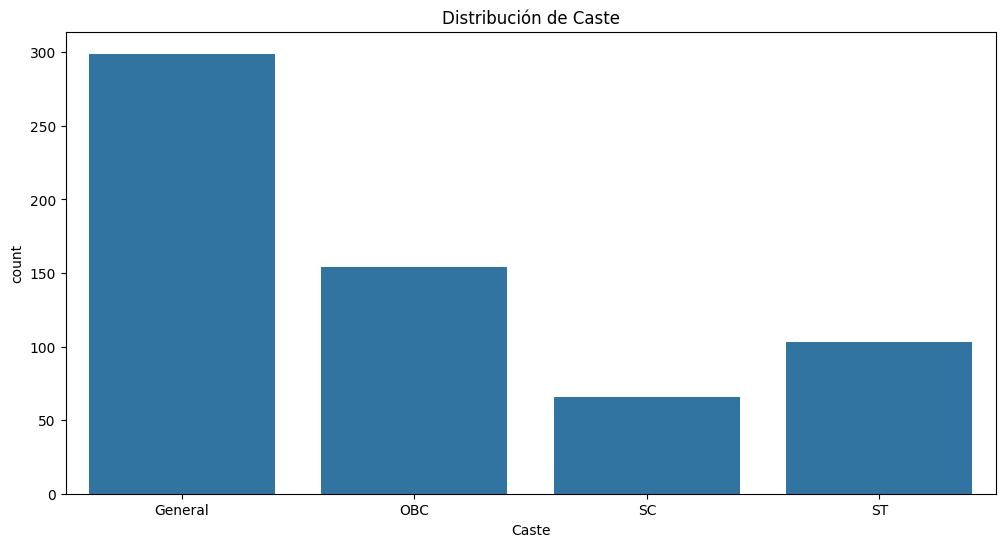

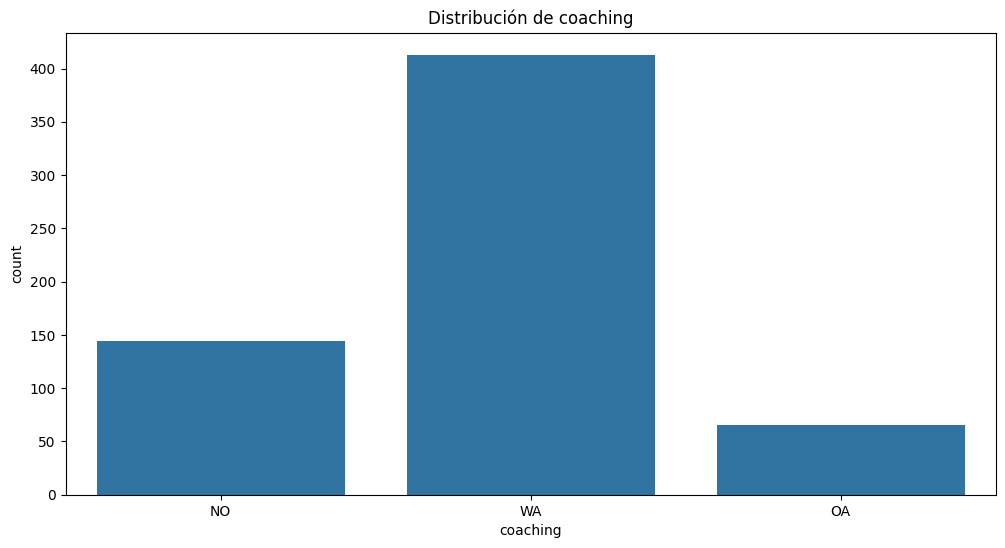

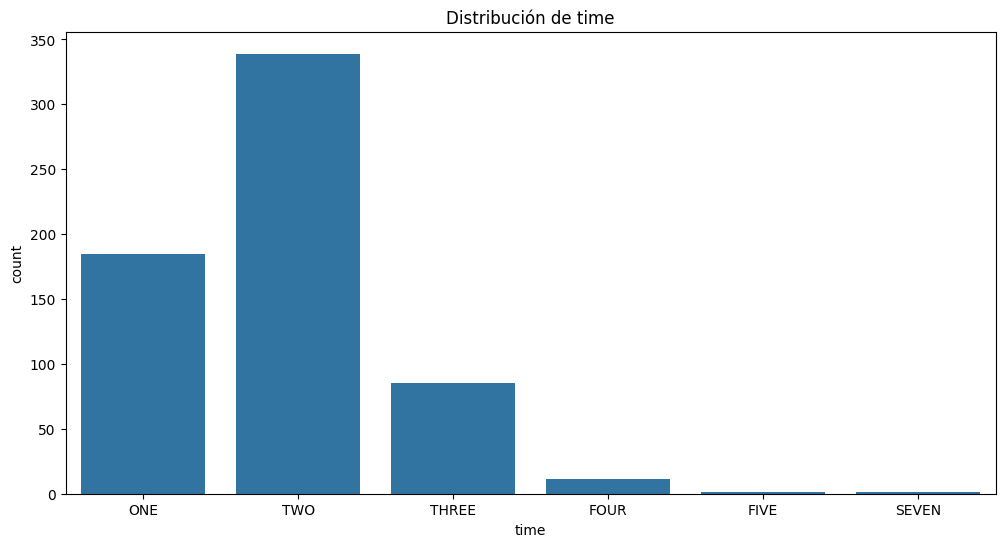

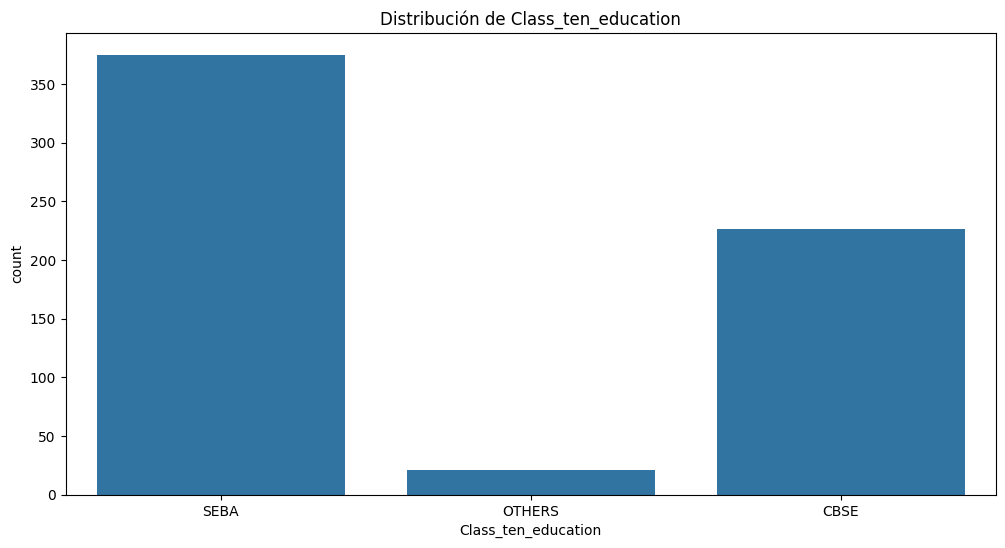

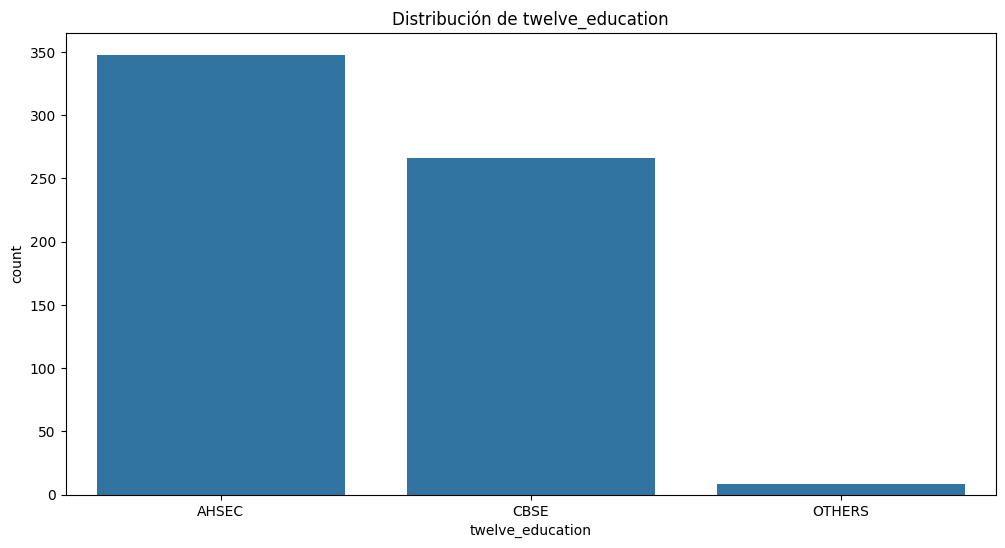

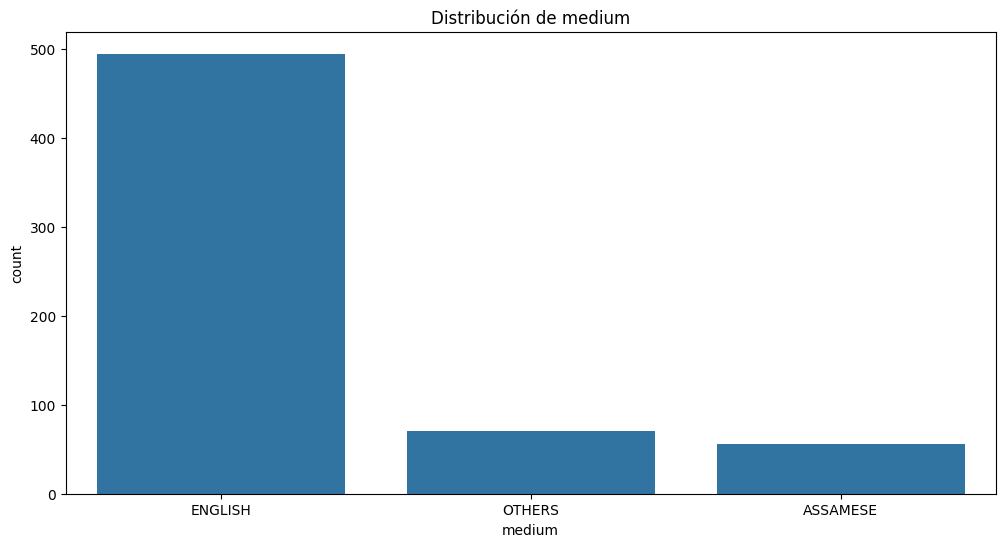

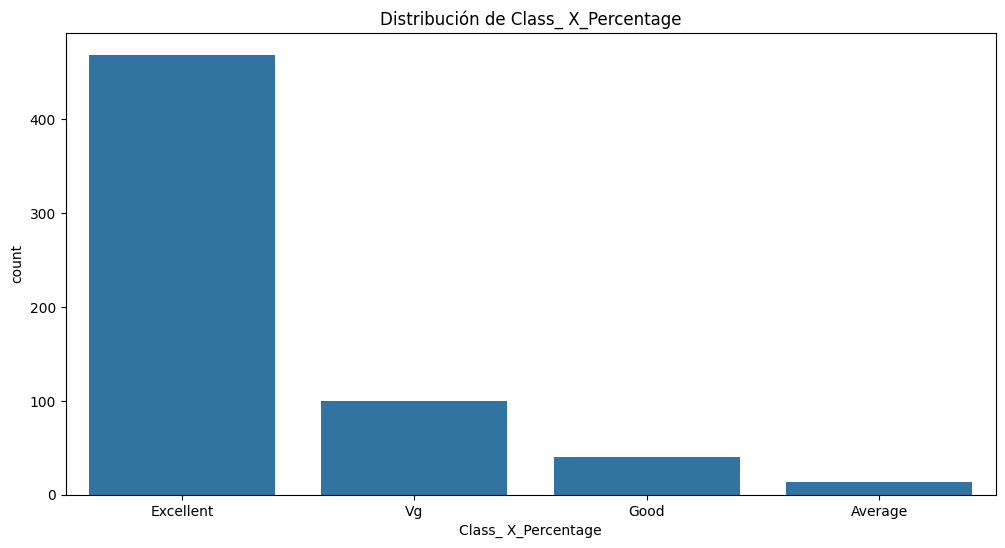

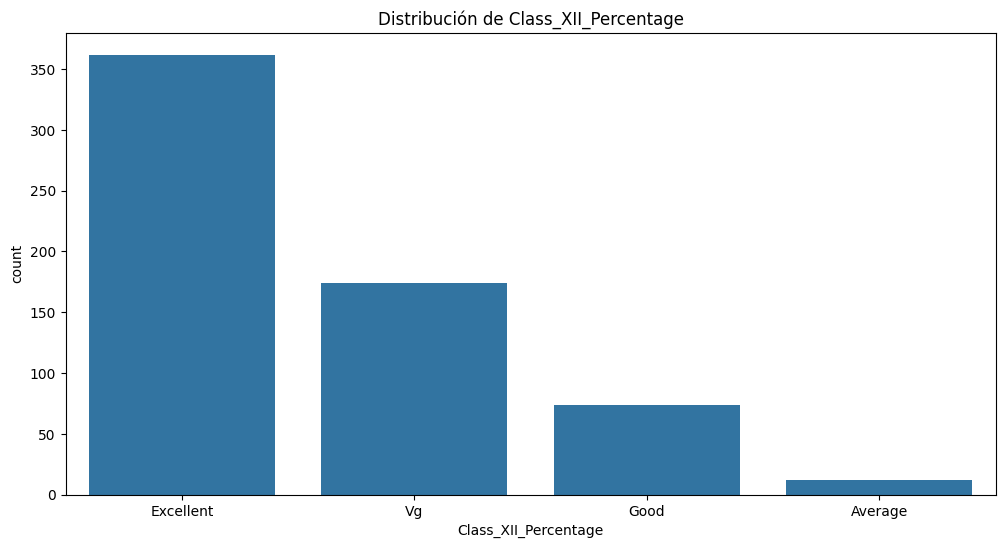

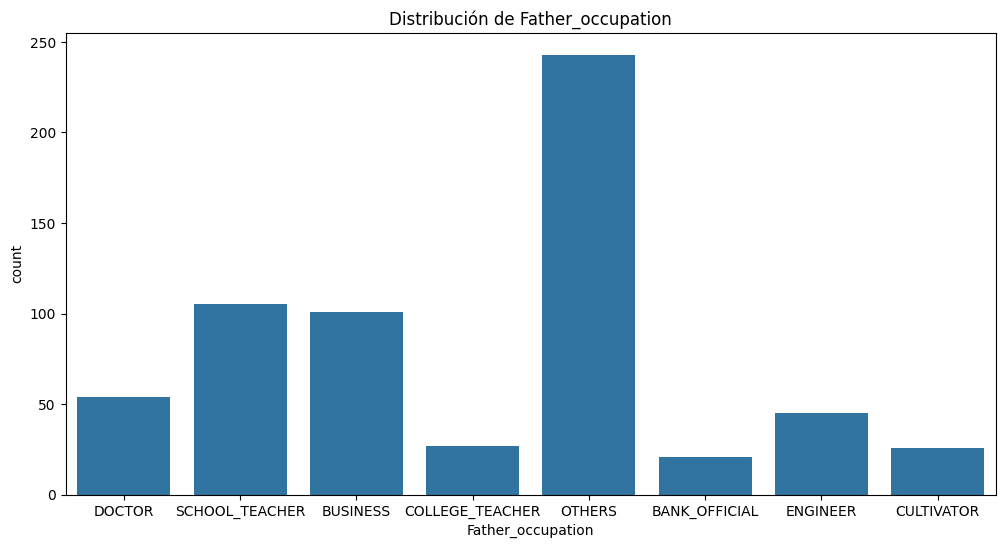

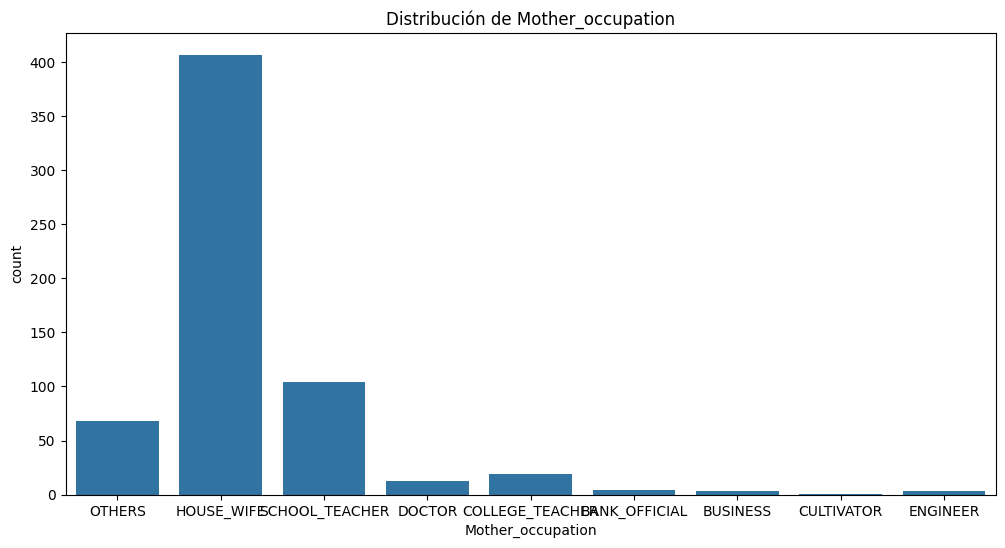

In [10]:
variables_categoricas = df.select_dtypes(include=['object'])

for columna in variables_categoricas.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x=columna)
    plt.title(f'Distribución de {columna}')

**Observamos la relación de la variable target "Perfomance" con respecto a las demas variables usando un diagrama de calor.**

<Axes: >

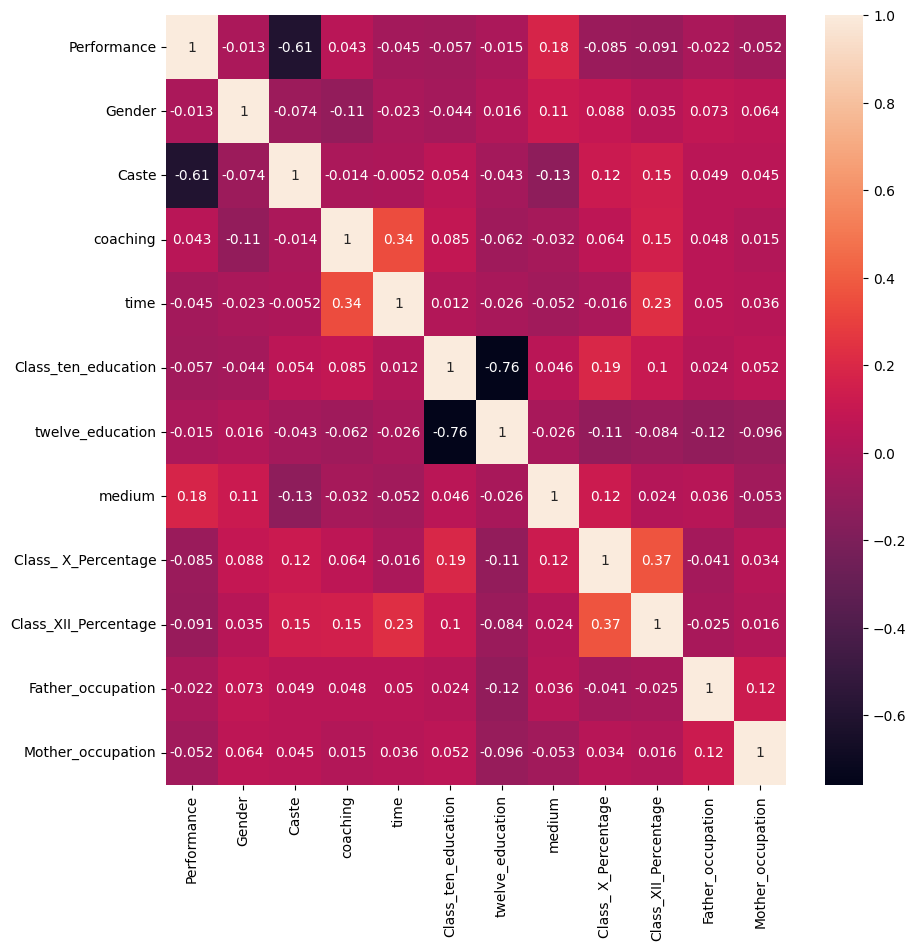

In [11]:
cat_encoder= LabelEncoder()
lista_colmuns= [col for col in df.columns]
for col in lista_colmuns:
  df[col]=cat_encoder.fit_transform(df[col])

corr_matrix=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,annot=True)

**Variables con correlación positiva:**

La variable 'Medium' muestra una correlación positiva moderada con Performance, con un valor de 0.18. Esto indica que el tipo de medio de educación está relacionado con un mejor rendimiento en la variable "Perfomance".


La variable 'Coaching' tiene una correlación positiva débil con Performance, con un valor de 0.051. Esto sugiere que la participación en actividades de tutoría tiene una relación marginalmente positiva con el Perfomance del estudiante.

**Variables con correlación negativa:**

La variable 'Caste' destaca por su correlación negativa significativa con Performance, con un valor de -0.62. Este sugiere que la pertenencia a ciertas castas tiene un impacto negativo considerable en el rendimiento.

Resultando en que diferencias socioeconómicas limitan el acceso a una buena educación lo que llega a tener un impacto en el aplicante.

# Asignamos perfomance como el taget de nuestro analisis y las demas como caracteristicas.

In [12]:
y= df['Performance']
X=df.drop('Performance',axis=1)

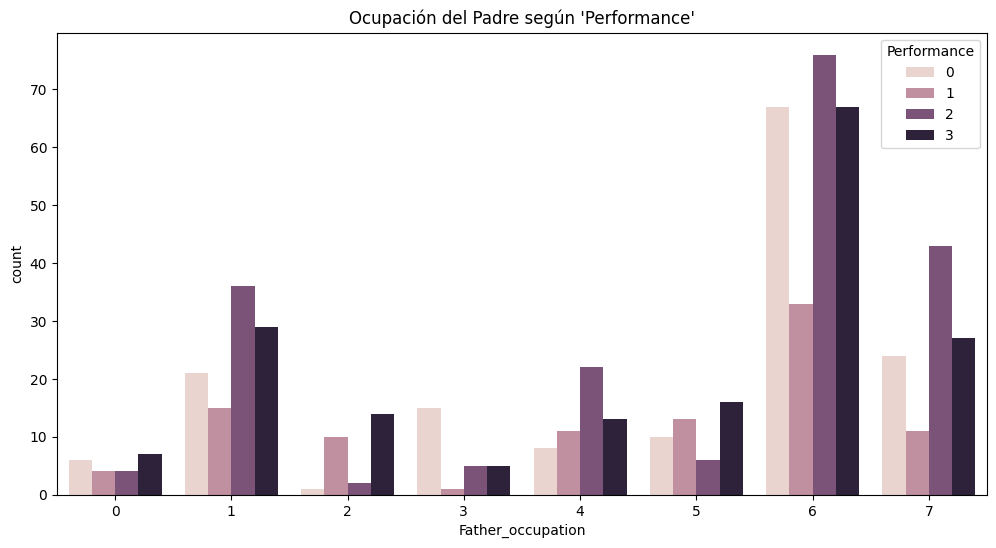

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Father_occupation', hue='Performance', data=df)
plt.title("Ocupación del Padre según 'Performance'")
plt.show()

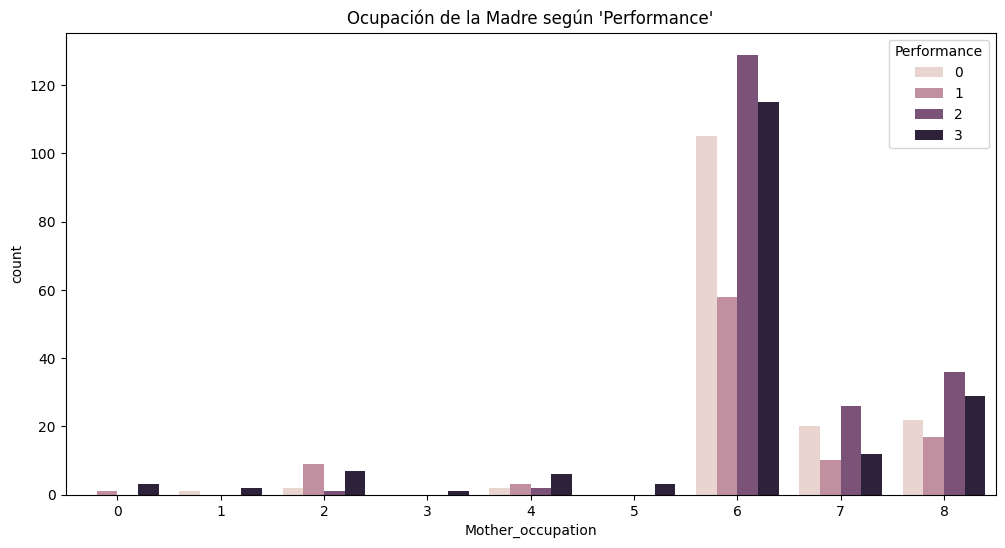

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Mother_occupation', hue='Performance', data=df)
plt.title("Ocupación de la Madre según 'Performance'")
plt.show()

# Codificación de las variables categóricas

Acorde al diagrama de calor se propone hacer la codificación One-Hot unicamente de las variables ya que son las que possen al menos una interaccion mayor o igual a 0.080:

-Class_ X_Percentage


-Class_ Xll_Percentage


-Medium


-Caste



In [18]:
df_OneHot= pd.get_dummies(df,columns=['Class_ X_Percentage','Class_XII_Percentage','medium','Caste'])#Realizamos la codificación OneHot para las variables seleccionadas

Codificamos el "Perfomance" usando Label Enconder

In [19]:
label_enconder= LabelEncoder()
df_OneHot['Performance']=label_enconder.fit_transform(df_OneHot['Performance'])

Dividimos el conjunto de train (70) y test (30)

In [21]:
X_new=df_OneHot
y_new=df['Performance']
X_train, X_test, y_train, y = train_test_split(X_new, y_new, test_size=0.3, random_state=42)

# Entramiento del modelo para la clasificación

Comenzaremos utilizando Random Forest

In [23]:
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Realizamos la predicción del modelo

In [24]:
y_pred = random_forest_classifier.predict(X_test)

In [29]:
accuracy = accuracy_score(y, y_pred)
print(f'Precisión del modelo: {accuracy * 100:.2f}%')

Precisión del modelo: 95.19%
